<a href="https://colab.research.google.com/github/maxi9113/Windows-universal-samples/blob/master/CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CLIP (Contrastive Language–Image Pre-training)

image–text retrieval and zero‑shot classification

Paper:
“Learning Transferable Visual Models From Natural Language Supervision” (Radford et al., OpenAI, 2021).

https://youtu.be/BcfAkQagEWU?t=1077

![](https://raw.githubusercontent.com/GerardoMunoz/Vision/refs/heads/main/imgs/CLIP.png)

## What you can do with CLIP
| Task | How to Use CLIP |
|---------------------------------|--------|
|**Zero-shot Classification** | Compare an image with texts such as “a picture of a cat,” “a picture of a dog,” and choose the most similar text. |
| **Image Search by Text** | Given a text, find the most similar images in the embedding. |
| **Reverse Search (Image → Text)** | Given an image, find related descriptions or tags. |
| **Semantic Analysis** | Measure how similar two concepts (image or text) are. |
| **Visual Grounding / Multimodal Retrieval** | Used as a basis for many larger models (e.g., CLIP + LlaMA = LLaVA, GPT-4V). |

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

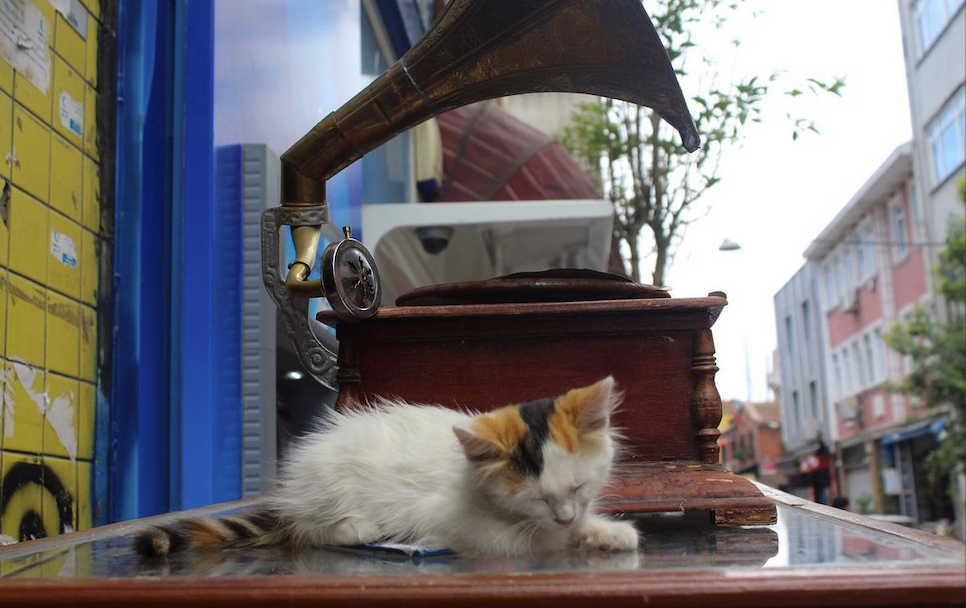

In [ ]:
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel
import torch

# Cargar modelo y procesador
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Imagen de ejemplo
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/cat.png"
image = Image.open(requests.get(url, stream=True).raw)
image


In [ ]:
texts = ["una foto de un gato", "una foto de un perro", "una foto de un auto", "una foto de un elefante"]

inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

# Similaridad imagen-texto
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)
for label, p in zip(texts, probs[0]):
    print(f"{label}: {p.item():.3f}")


una foto de un gato: 0.965
una foto de un perro: 0.022
una foto de un auto: 0.010
una foto de un elefante: 0.003


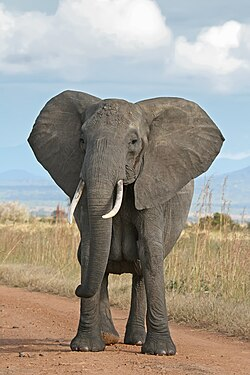

In [ ]:
from PIL import Image
import requests
from io import BytesIO

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/African_Bush_Elephant.jpg/250px-African_Bush_Elephant.jpg"

headers = {"User-Agent": "Mozilla/5.0"}  # Wikipedia exige un agente válido
response = requests.get(url, headers=headers)

response.raise_for_status()  # lanza error si no fue 200 OK

image = Image.open(BytesIO(response.content))
image


In [ ]:
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

# Similaridad imagen-texto
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)
for label, p in zip(texts, probs[0]):
    print(f"{label}: {p.item():.3f}")

una foto de un gato: 0.000
una foto de un perro: 0.000
una foto de un auto: 0.000
una foto de un elefante: 1.000
